In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_img,y_train_label),(x_test_img,y_test_label) = mnist.load_data()

In [4]:
print(x_train_img.shape)
print(y_train_label.shape)

(60000, 28, 28)
(60000,)


In [5]:
import matplotlib.pyplot as plt
def plot_img(img):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(img,cmap='binary')
    plt.show()

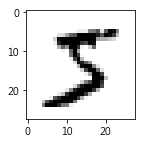

In [6]:
plot_img(x_train_img[0])

In [7]:
x_Train = x_train_img.reshape(60000,784).astype('float32')
x_Test = x_test_img.reshape(10000,784).astype('float32')

In [20]:
x_Train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(x_Train)
predict_k = kmeans.labels_

#vis_cluster(pg, num_clusters)

In [10]:
kdf = pd.DataFrame({'label':y_train_label,'pre':predict_k})

In [17]:
kdf[kdf['label']==0].head()

,label,pre
1,0,6
21,0,6
34,0,2
37,0,2
51,0,6


In [12]:
pd.crosstab(y_train_label,predict_k)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,7,5,1143,3,2,167,4248,80,224,44
1,9,10,6,3646,3046,6,0,8,5,6
2,4153,65,222,387,327,133,43,178,257,193
3,158,35,464,419,50,33,22,914,3868,168
4,33,1889,184,168,207,142,7,11,0,3201
5,5,165,1585,172,228,72,51,960,1811,372
6,65,1,1406,240,45,3986,54,23,33,65
7,40,3766,11,341,257,4,20,17,5,1804
8,43,161,305,326,268,45,29,3486,1010,178


In [13]:
ddd = {0:6,2:0,3:8,4:9,5:2,6:5,7:1,8:7}

In [14]:
predict_k2 = [ddd[n] if n in ddd.keys() else n   for n in predict_k ]

In [15]:
df2 = pd.DataFrame({'label':y_train_label,'pre':predict_k2})

In [23]:
len(df2[df2['label']==df2['pre']])/len(df2)

0.079